[0.00182046 0.00187545 0.00225323 0.00275428 0.00396927 0.00262061
 0.00130303 0.00184099 0.00256097 0.00246154 0.00285708]
[0.00236228 0.00235587 0.00387428 0.00202859 0.0122968  0.00468975
 0.00323101 0.00426687 0.00479352 0.00572317 0.00380694]
[0.00254023 0.00244479 0.00249885 0.00271205 0.00232906 0.00289315
 0.00196301 0.00231328 0.00364208 0.00436777 0.00196341]
[0.00349773 0.0022371  0.0023646  0.00325675 0.00354768 0.0028351
 0.00392207 0.0140848  0.00537603 0.00397249 0.00871697]
[0.00194148 0.00237645 0.00291472 0.00141488 0.00208764 0.00204466
 0.00256354 0.00233155 0.00205352 0.00298311 0.00270738]
[0.00263509 0.00231347 0.0022002  0.00579923 0.00438245 0.0012939
 0.00401741 0.00831759 0.00296379 0.00234699 0.00758389]


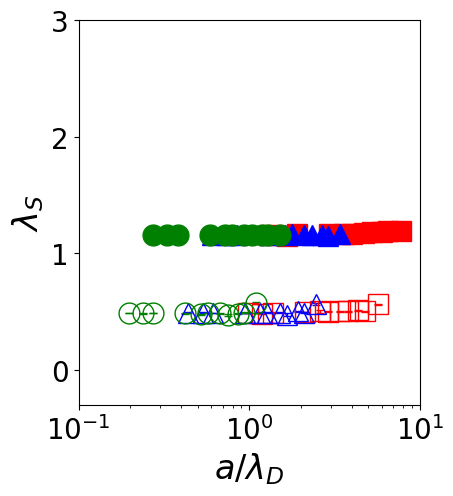

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os


# ---------- Load reference x-data (a/λ_D) ---------- #
x_df = pd.read_csv("a_lambda_d.csv")

# ---------- Color & marker mapping ---------- #
color_map = {'0.2': 'red', '1': 'blue', '5': 'green'}
marker_map = {'0.2': 's', '1': '^', '5': 'o'}

fig, ax = plt.subplots(figsize=(4.4, 5))

def period_calc(omega, omega_err):
    omega = np.array(omega)
    omega_err = np.array(omega_err)
    period = np.pi / omega
    period_err = np.pi * omega_err / (omega**2)
    return np.abs(period), np.abs(period_err)

def power_func(x, A, alpha):
    return A * x**(alpha)

# ---------- Plot for each condition ---------- #
for dtype in ['MD']:
    for eps in ['0.2', '1', '5']:
        for pot in ['LJ', 'WCA']:


            nnname = f"ssfit_params_{dtype}_{eps}_{pot}.csv"
            n_df = pd.read_csv(nnname)

            # --- x = lambda_Z/lambda_N --- #
            x = x_df[f"{eps}_{pot}"]
            x = np.array(x)

            # --- Error propagation --- #
            lambda_N = n_df["lambda_fit"].to_numpy()
            lambda_N_err = n_df["lambda_fit_error"].to_numpy()

            # --- Marker style --- #
            filled = (pot == "LJ")

            if dtype == "MD":
                color = color_map[eps]
                zorder_temp = 1000
            else:  # LD dataset
                color = "black"
                zorder_temp=1
                
            ax.errorbar(
                x, lambda_N, yerr=lambda_N_err,
                fmt=marker_map[eps],
                markersize=15,
                color=color,
                mfc=color if filled else 'none',
                mec=color,
                ecolor=color,
                elinewidth=1,
                capsize=3,
                label=f"{eps} {pot}"
            )


# ---------- Axes ---------- #
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlim(0.1,10)
ax.set_xlabel(r'${a}/{\lambda_D}$', fontsize=24)
ax.set_ylabel(r'${\lambda}_{S}$', fontsize=24)
ax.tick_params(axis='both', which='both', labelsize=20)
# plt.axhline(y=0.5, linestyle="--", linewidth=3, color="black")
# plt.axhline(y=1, linestyle="--", linewidth=3, color="black")
plt.ylim (-0.3,3)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


# plt.tight_layout()
plt.show()